## Tabular Playground Series
**August 2022** | **Super Soaker Product Failure**

In [1]:
# ! pip install --user --upgrade pandas
# ! pip install seaborn

# Visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Data Processing
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Modeling 
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import cluster, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score, StratifiedKFold
    
# Other
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")



### Data Overview
This dataset is comprised of an id for each record, a failure percentage, and 24 different features.

* Each record has an associated product code and 4 attributes, none of which are null.
* There are an additional 18 measurements; 3 are integers and 15 are decimal values.  
    + The decimal attributes contain a small amount of null data.
    + The integer attributes contain no null data.
    
The goal with this dataset is to predict the failure rate for this data.  Within the training dataset there is a 21.2% failure rate.

In [3]:
train.describe()
#train.info()


,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26570.000000,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,13284.500000,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,7670.242662,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,0.000000,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,6642.250000,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,13284.500000,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,19926.750000,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,26569.000000,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [4]:
train.head()

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


In [5]:
print('Failure frequency:')
train['failure'].value_counts(normalize=True)

Failure frequency:


0    0.787392
1    0.212608
Name: failure, dtype: float64

**Review feature types**

In [6]:
float_features = train.select_dtypes(np.float64).columns
int_features = train.select_dtypes(np.int64).columns
int_features = int_features.drop("id")
object_features = train.select_dtypes(np.object).columns

print("float_features:", float_features)
print("int_features:", int_features)
print("object_features:", object_features)

float_features: Index(['loading', 'measurement_3', 'measurement_4', 'measurement_5',
       'measurement_6', 'measurement_7', 'measurement_8', 'measurement_9',
       'measurement_10', 'measurement_11', 'measurement_12', 'measurement_13',
       'measurement_14', 'measurement_15', 'measurement_16', 'measurement_17'],
      dtype='object')
int_features: Index(['attribute_2', 'attribute_3', 'measurement_0', 'measurement_1',
       'measurement_2', 'failure'],
      dtype='object')
object_features: Index(['product_code', 'attribute_0', 'attribute_1'], dtype='object')


**Missing Data**

In [44]:
train[float_features].isnull().sum()
test[float_features].isnull().sum()

loading            223
measurement_3      329
measurement_4      409
measurement_5      508
measurement_6      624
measurement_7      720
measurement_8      846
measurement_9      904
measurement_10    1067
measurement_11    1136
measurement_12    1240
measurement_13    1303
measurement_14    1440
measurement_15    1542
measurement_16    1678
measurement_17    1740
dtype: int64

In [45]:
# replace null values with mean for all columns
for col in float_features:
    if train[col].isnull().sum():
        train[col].fillna(train[col].mean(), inplace=True)
        
for col in float_features:
    if test[col].isnull().sum():
        test[col].fillna(train[col].mean(), inplace=True)

**Variable Distributions**

*Integer & Float Features*

* Attributes 2 and 3 have discrete values with only a few possible values.  These values are all distributed approximately equally, but do have a distinct mode.  Rates of failure are approximately equal across both of these attributes.
* Across the various measurement values, the rates of failure have very similar values, however the following have some differentiation when compared to the similiarites seen in other measurements:
    + Measurement 0
    + Measurement 1
    + Measurement 2
    + Measurement 5
    + Measurement 17
    + Loading

In [9]:
train.groupby("attribute_2").mean("failure")
train.groupby("attribute_3").mean("failure")

,id,loading,attribute_2,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
attribute_3,,,,,,,,,,,,,,,,,,,,,
5,2549.5,127.472789,9.000000,10.325882,4.229412,5.226078,17.808297,11.716420,17.142739,17.505202,...,11.436223,16.124049,19.424034,12.214222,15.589697,16.107017,14.496351,16.414226,702.531029,0.227255
6,18670.5,128.430574,6.000000,7.852308,9.790884,7.262520,17.775820,11.713145,17.114801,17.524227,...,11.431733,16.453463,19.089568,11.581702,15.602480,16.107316,14.782182,16.707126,700.263600,0.217527
8,10607.0,127.742120,6.429868,6.773400,8.619428,6.610350,17.790192,11.734024,17.131999,17.501896,...,11.426826,16.112230,18.948639,11.571269,15.732280,16.100438,15.273461,16.544112,700.893347,0.206264
9,23898.0,127.758792,6.000000,5.545199,9.764926,5.548381,17.793301,11.760678,17.117338,17.521450,...,11.432548,15.801723,19.471198,11.599992,15.597839,15.829020,15.103275,16.097463,701.801030,0.207000


In [10]:
group = train.groupby("failure").mean("id")
pd.set_option('display.max_columns', None)

group.head()

,id,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
failure,,,,,,,,,,,,,,,,,,,,,,
0,13314.571913,125.231300,6.749199,7.255007,7.395249,8.256106,6.229387,17.789691,11.737302,17.118698,17.503334,11.708201,19.016093,11.432498,16.118763,19.175670,11.699270,15.653930,16.043973,14.998191,16.458897,699.285343
1,13173.129049,137.436531,6.771995,7.186582,7.492300,8.145158,6.357231,17.798329,11.712308,17.161524,17.538256,11.747820,19.056641,11.424155,16.113811,19.158809,11.714294,15.649103,16.065001,14.985789,16.467505,708.615723


In [11]:
train.groupby("attribute_3").mean("failure")

,id,loading,attribute_2,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
attribute_3,,,,,,,,,,,,,,,,,,,,,,
5,2549.5,127.472789,9.000000,10.325882,4.229412,5.226078,17.808297,11.716420,17.142739,17.505202,11.734631,19.033902,11.436223,16.124049,19.424034,12.214222,15.589697,16.107017,14.496351,16.414226,702.531029,0.227255
6,18670.5,128.430574,6.000000,7.852308,9.790884,7.262520,17.775820,11.713145,17.114801,17.524227,11.710708,19.031911,11.431733,16.453463,19.089568,11.581702,15.602480,16.107316,14.782182,16.707126,700.263600,0.217527
8,10607.0,127.742120,6.429868,6.773400,8.619428,6.610350,17.790192,11.734024,17.131999,17.501896,11.718802,19.018904,11.426826,16.112230,18.948639,11.571269,15.732280,16.100438,15.273461,16.544112,700.893347,0.206264
9,23898.0,127.758792,6.000000,5.545199,9.764926,5.548381,17.793301,11.760678,17.117338,17.521450,11.700607,19.021035,11.432548,15.801723,19.471198,11.599992,15.597839,15.829020,15.103275,16.097463,701.801030,0.207000


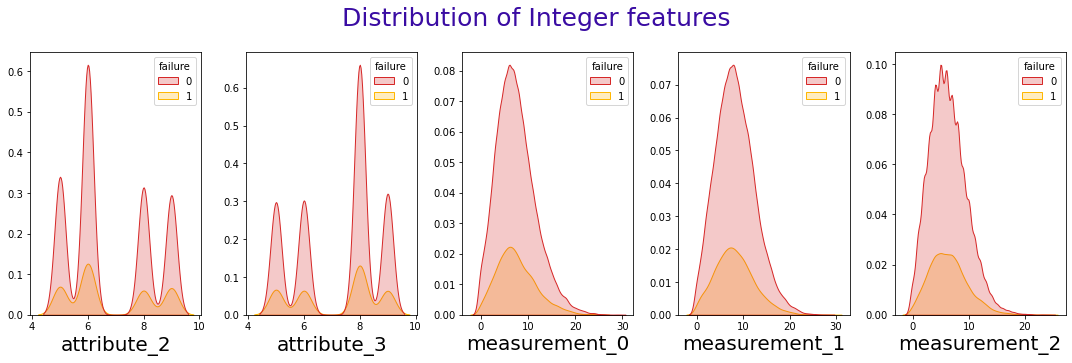

In [12]:
fig, axes = plt.subplots(1, 5, figsize = (15,5))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(int_features) - 1:
        sns.kdeplot(x = int_features[i], hue='failure', data = train, fill = True, ax = ax, palette = ["#d62828","#ffb703"])
        ax.tick_params()
        ax.xaxis.get_label().set_fontsize(20)
        ax.set_ylabel('')
fig.suptitle('Distribution of Integer features', color="#3a0ca3",fontsize = 25, x = 0.5, y = 1)
plt.tight_layout()
plt.show()

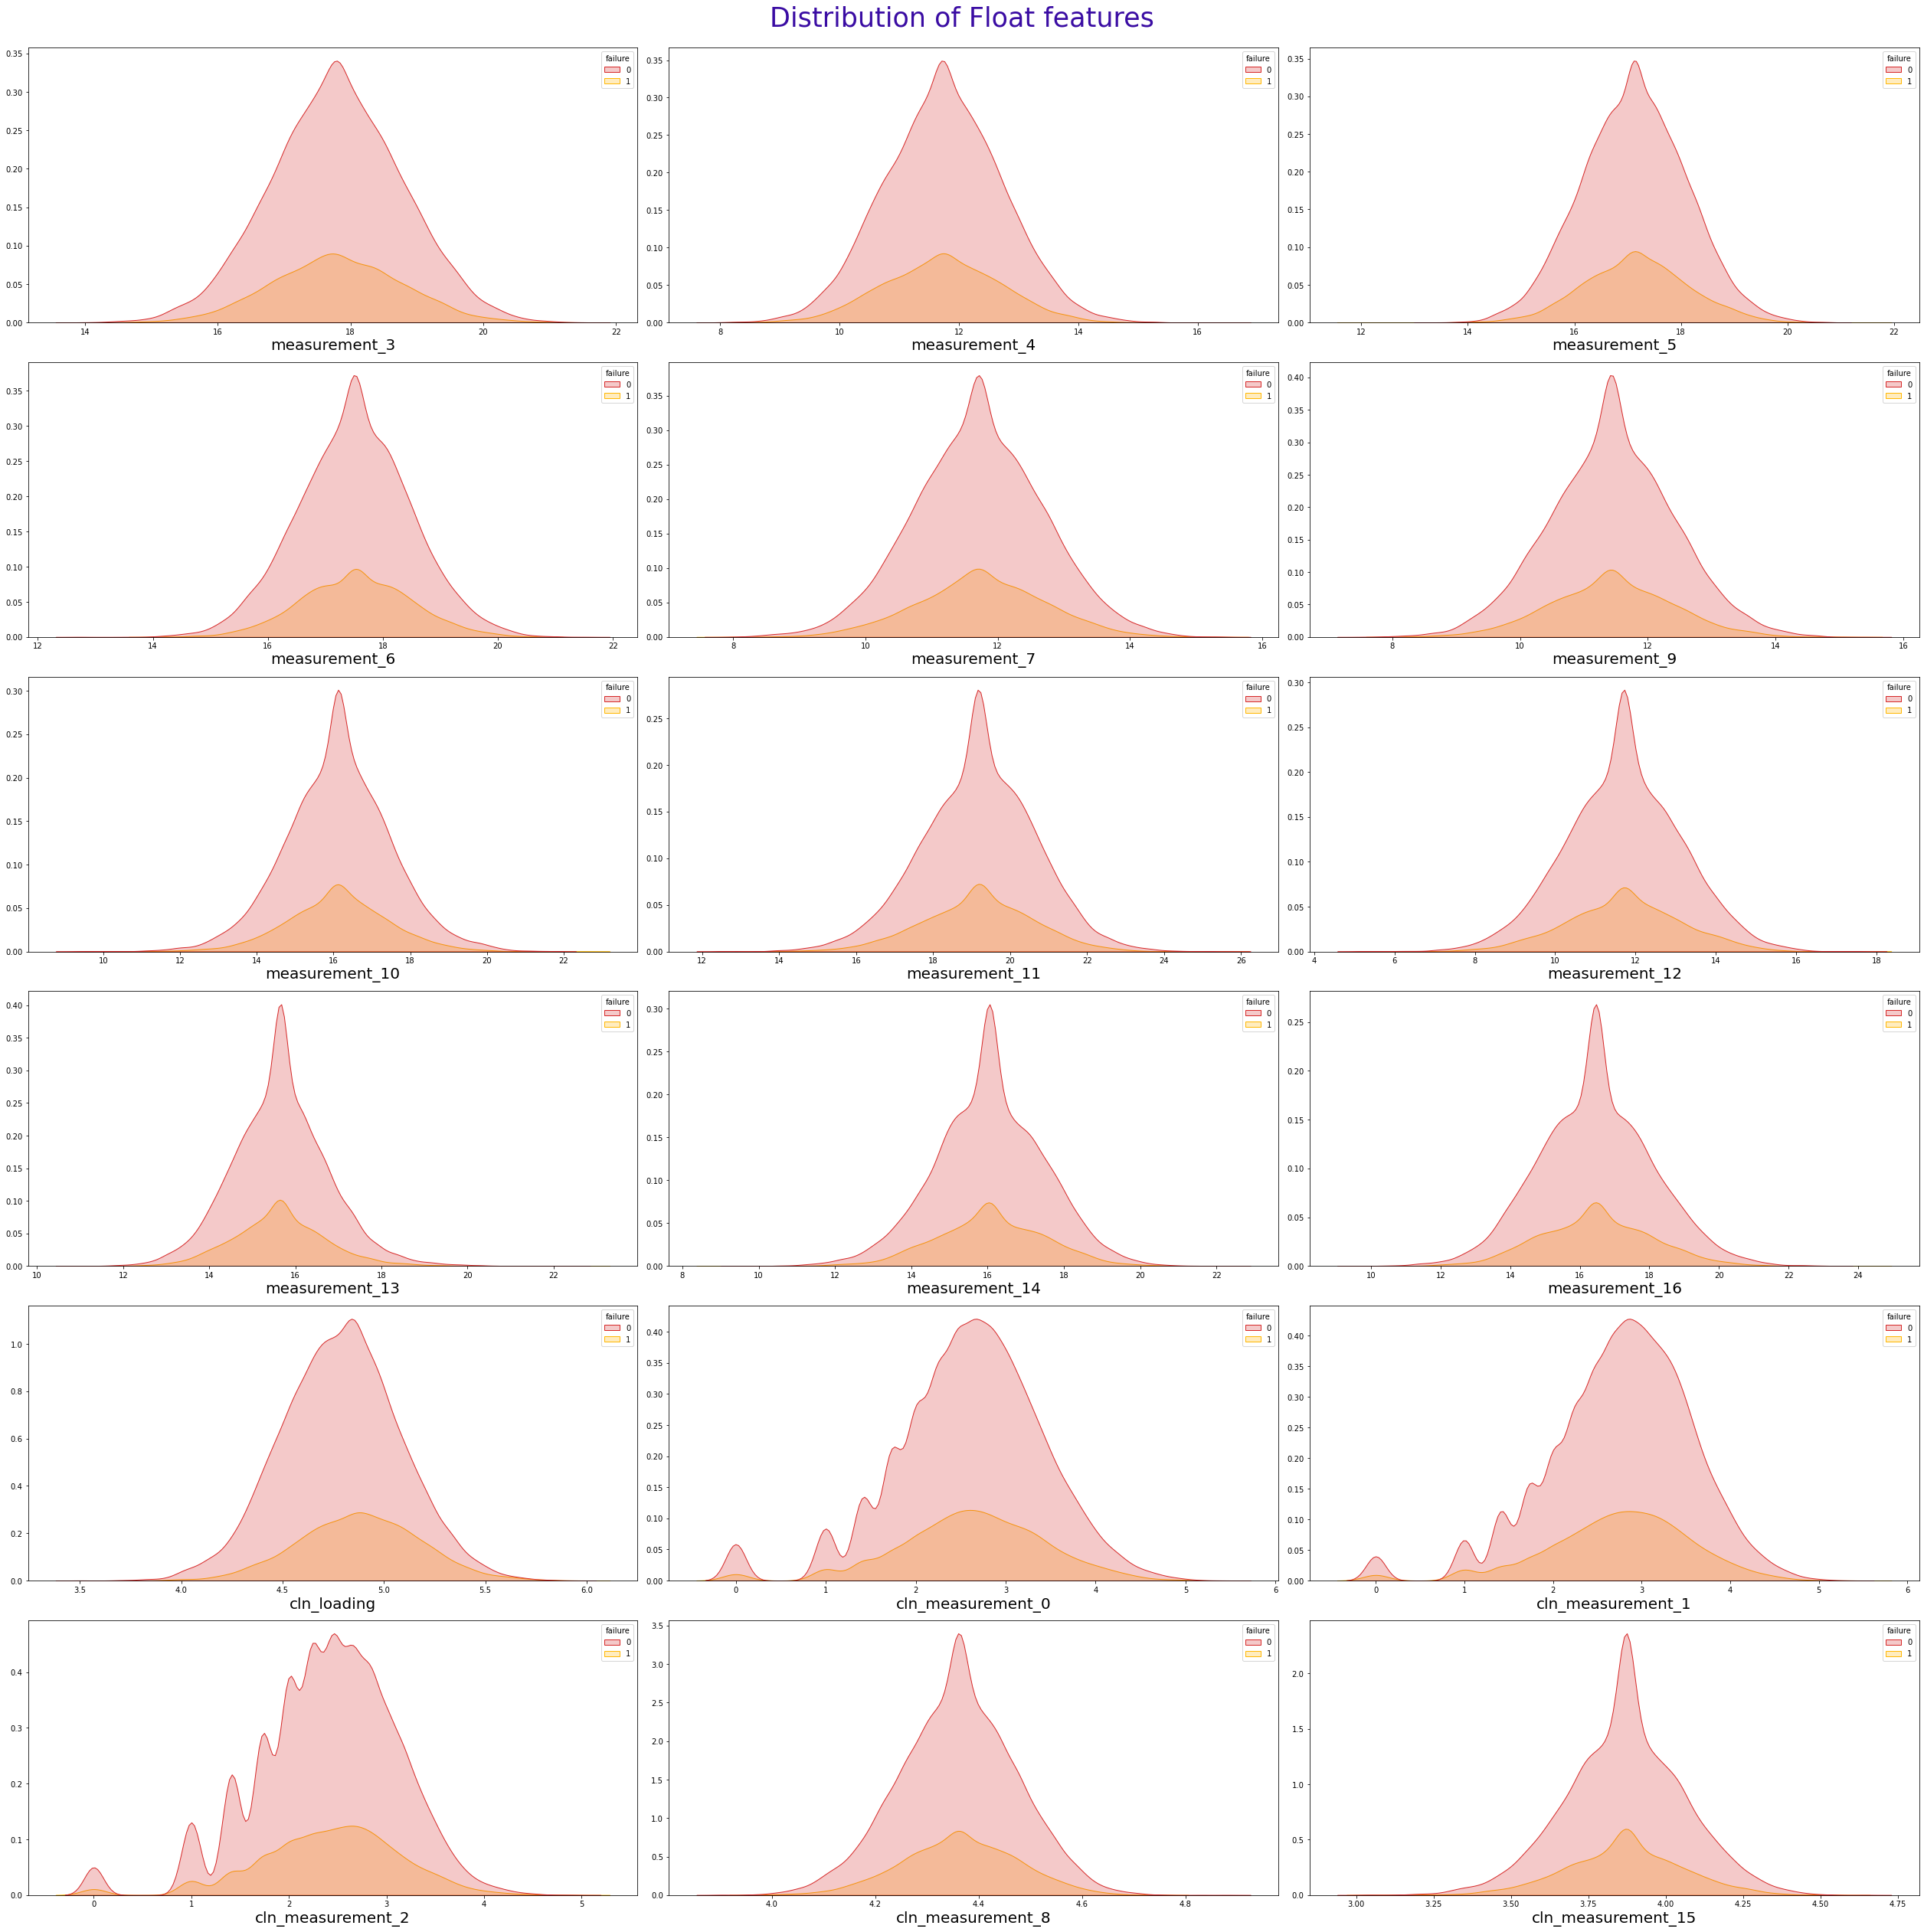

In [13]:
cln_train = train
cln_train["cln_loading"] = np.log(train["loading"])
cln_train["cln_measurement_0"] = np.sqrt(train["measurement_0"])
cln_train["cln_measurement_1"] = np.sqrt(train["measurement_1"])
cln_train["cln_measurement_2"] = np.sqrt(train["measurement_2"])
cln_train["cln_measurement_8"] = np.sqrt(train["measurement_8"])
cln_train["cln_measurement_15"] = np.sqrt(train["measurement_15"])
cln_train["cln_measurement_17"] = np.sqrt(train["measurement_17"])

cln_train = cln_train.drop("loading", axis = 1)
cln_train = cln_train.drop("measurement_0", axis = 1)
cln_train = cln_train.drop("measurement_1", axis = 1)
cln_train = cln_train.drop("measurement_2", axis = 1)
cln_train = cln_train.drop("measurement_8", axis = 1)
cln_train = cln_train.drop("measurement_15", axis = 1)
cln_train = cln_train.drop("measurement_17", axis = 1)

cln_float_features = cln_train.select_dtypes(np.float64).columns

fig, axes = plt.subplots(6, 3, figsize = (35,35))
for i, ax in enumerate(axes.reshape(-1)):
    if i < len(cln_float_features) - 1:
        sns.kdeplot(x = cln_float_features[i], hue='failure', data = cln_train, fill = True, ax = ax, palette = ["#d62828","#ffb703"])
        ax.tick_params()
        ax.xaxis.get_label().set_fontsize(20)
        ax.set_ylabel('')
fig.suptitle('Distribution of Float features', color="#3a0ca3",fontsize = 35, x = 0.5, y = 1)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Correlations')

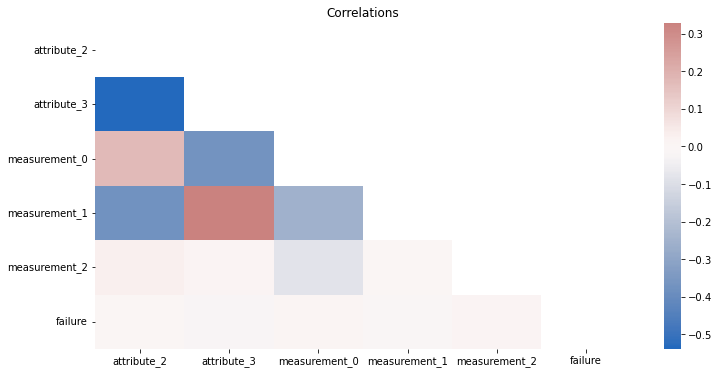

In [15]:
plt.figure(figsize=(12,6))
corr = train[int_features].corr()
matrix = np.triu(corr)
sns.heatmap(corr, mask = matrix, center = 0, cmap = 'vlag').set_title('Correlations')

# failure isn't strongly correlated with any of these variables, but some of these variables 
# have strong correlations with each other.

In [16]:
#! pip install pingouin
import pingouin as pg

# calculate partial correlations
cln_train.pcorr().round(3)


,id,attribute_2,attribute_3,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_16,failure,cln_loading,cln_measurement_0,cln_measurement_1,cln_measurement_2,cln_measurement_8,cln_measurement_15,cln_measurement_17
id,1.000,-0.601,0.232,-0.002,0.003,0.002,0.014,-0.000,0.004,-0.019,0.111,0.017,-0.004,-0.038,-0.051,0.003,-0.002,-0.046,0.141,0.018,0.007,-0.076,-0.008
attribute_2,-0.601,1.000,-0.205,-0.002,-0.007,-0.005,0.002,-0.005,0.001,-0.063,0.132,0.140,0.068,-0.018,-0.049,-0.003,-0.010,-0.080,-0.143,0.051,-0.007,-0.089,0.011
attribute_3,0.232,-0.205,1.000,-0.001,0.005,-0.005,-0.009,-0.007,-0.004,-0.105,0.006,0.001,0.062,-0.032,-0.056,-0.015,-0.005,-0.278,0.083,0.008,-0.018,0.129,0.014
measurement_3,-0.002,-0.002,-0.001,1.000,-0.021,-0.053,-0.040,-0.043,-0.015,-0.006,-0.003,0.001,0.006,0.002,-0.003,0.002,-0.006,-0.010,-0.008,-0.003,-0.063,-0.011,0.106
measurement_4,0.003,-0.007,0.005,-0.021,1.000,-0.157,-0.124,-0.131,-0.052,-0.014,-0.001,0.001,-0.001,-0.000,0.003,-0.013,-0.013,-0.005,-0.008,-0.005,-0.164,-0.008,0.280
measurement_5,0.002,-0.005,-0.005,-0.053,-0.157,1.000,-0.253,-0.266,-0.125,-0.004,0.007,0.002,-0.004,0.006,-0.005,0.006,-0.011,-0.003,-0.006,0.007,-0.351,-0.008,0.574
measurement_6,0.014,0.002,-0.009,-0.040,-0.124,-0.253,1.000,-0.200,-0.091,-0.003,0.000,-0.007,-0.001,-0.001,-0.005,0.005,0.001,-0.001,-0.005,-0.004,-0.271,-0.000,0.448
measurement_7,-0.000,-0.005,-0.007,-0.043,-0.131,-0.266,-0.200,1.000,-0.095,-0.005,-0.003,0.005,0.000,0.001,-0.011,0.008,-0.009,-0.006,-0.012,0.010,-0.273,-0.003,0.455
measurement_9,0.004,0.001,-0.004,-0.015,-0.052,-0.125,-0.091,-0.095,1.000,-0.008,-0.006,-0.006,-0.004,-0.011,-0.003,-0.006,-0.006,0.010,0.005,0.008,-0.129,-0.004,0.213
measurement_10,-0.019,-0.063,-0.105,-0.006,-0.014,-0.004,-0.003,-0.005,-0.008,1.000,-0.023,0.030,0.035,0.028,-0.005,-0.003,-0.011,0.001,0.032,0.024,-0.008,-0.036,0.010


*Character Variables*

* Product codes are equally distributed

In [17]:
cln_train.product_code.value_counts()
cln_train.groupby("product_code").mean("failure")

,id,attribute_2,attribute_3,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_16,failure,cln_loading,cln_measurement_0,cln_measurement_1,cln_measurement_2,cln_measurement_8,cln_measurement_15,cln_measurement_17
product_code,,,,,,,,,,,,,,,,,,,,,,,
A,2549.5,9.0,5.0,17.808297,11.716420,17.142739,17.505202,11.734631,11.436223,16.124049,19.424034,12.214222,15.589697,16.107017,16.414226,0.227255,4.803411,3.138072,1.923690,2.182072,4.361303,3.802046,26.433710
B,7724.5,8.0,8.0,17.788638,11.719948,17.132634,17.504733,11.725446,11.422425,16.091282,19.106516,11.901085,15.902812,16.100051,16.704135,0.200381,4.803727,2.325152,2.782637,2.727078,4.358258,3.880694,26.403931
C,13232.0,5.0,8.0,17.791608,11.746842,17.131421,17.499312,11.712751,11.430834,16.131306,18.804865,11.270917,15.576981,16.100790,16.398383,0.211622,4.808580,2.570559,2.907429,2.242583,4.360789,3.923079,26.380662
D,18670.5,6.0,6.0,17.775820,11.713145,17.114801,17.524227,11.710708,11.431733,16.453463,19.089568,11.581702,15.602480,16.107316,16.707126,0.217527,4.810774,2.734619,3.058376,2.624832,4.361100,3.839583,26.340140
E,23898.0,6.0,9.0,17.793301,11.760678,17.117338,17.521450,11.700607,11.432548,15.801723,19.471198,11.599992,15.597839,15.829020,16.097463,0.207000,4.806512,2.237802,3.058395,2.216090,4.359846,3.884280,26.366788


AttributeError: 'Rectangle' object has no property 'c'

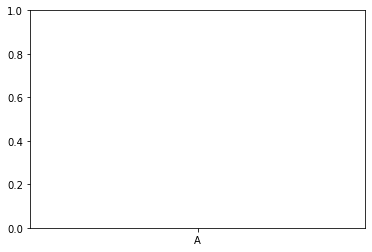

In [18]:
plt.bar(cln_train["product_code"], cln_train["failure"], c = cln_train["failure"])

**Dummy Variables**

In [ ]:
# for var in object_features:
#     tempdf = pd.get_dummies(train[var], prefix = var)
#     tempdf_test = pd.get_dummies(test[var], prefix = var)
#     train = pd.merge(left = train, right = tempdf, left_index = True, right_index = True)
#     test = pd.merge(left = test, right = tempdf_test, left_index = True, right_index = True)
# train = train.drop(object_features, axis = 1)
# test = test.drop(object_features, axis = 1)

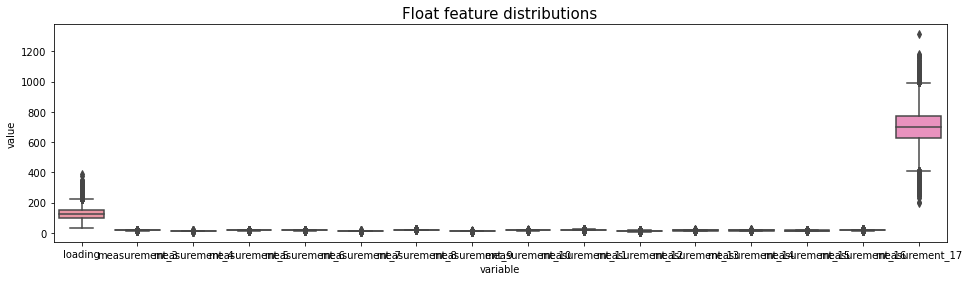

In [19]:
# show the distribution for all float features
temp = pd.DataFrame(data = train[float_features])
plt.figure(figsize=(16,4)) 
sns.boxplot(x="variable", y="value", data=pd.melt(temp)).set_title('Float feature distributions',size=15)
plt.show()

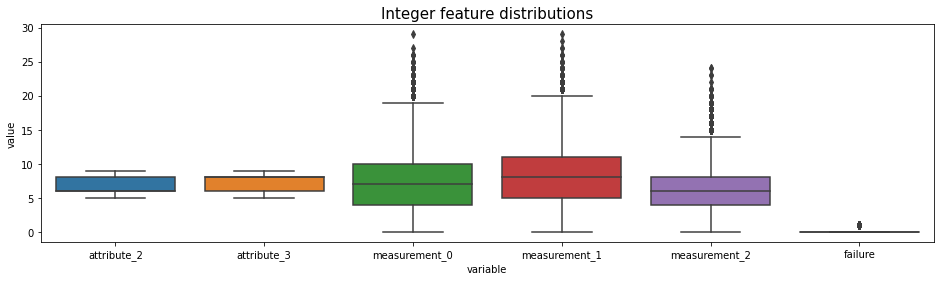

In [20]:
# show the distribution for all float features
temp = pd.DataFrame(data = train[int_features])
plt.figure(figsize=(16,4)) 
sns.boxplot(x="variable", y="value", data=pd.melt(temp)).set_title('Integer feature distributions',size=15)
plt.show()

#### Add Interactions

In [21]:
cln_train["inter_loading_msmt_0"] = cln_train["cln_loading"]*cln_train["cln_measurement_0"]
cln_train["inter_loading_msmt_2"] = cln_train["cln_loading"]*cln_train["cln_measurement_2"]
cln_train["inter_loading_attr_2"] = cln_train["cln_loading"]*cln_train["attribute_2"]

In [22]:
# create logistic regression model

target = "failure"
id_var = "id"

predictors = ["cln_loading", "cln_measurement_0", "cln_measurement_2", "cln_measurement_17"]

X = cln_train[predictors]
y = cln_train[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, stratify=y)



In [23]:
space = {"C":np.logspace(-4, 4, 50),"penalty":["l1", "l2"], "solver":['liblinear', 'lbfgs', 'newton-cg']}
gsLR = GridSearchCV(LogisticRegression(max_iter = 200), space ,scoring='roc_auc', cv = 3, verbose = 1)
gsLR.fit(X_train, y_train.values.squeeze())
print(gsLR.best_params_)

LR_best = gsLR.best_estimator_
print(gsLR.best_params_)
print('Validation AUC:', round(roc_auc_score(y_train, LR_best.predict_proba(X_train)[:,1]), 4))
print('Validation AUC:', round(roc_auc_score(y_test, LR_best.predict_proba(X_test)[:,1]), 4))

Fitting 3 folds for each of 300 candidates, totalling 900 fits
{'C': 16.768329368110066, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 16.768329368110066, 'penalty': 'l2', 'solver': 'liblinear'}
Validation AUC: 0.5903
Validation AUC: 0.5898


Feature: 0, Score: 1.01742
Feature: 1, Score: 0.03333
Feature: 2, Score: 0.06753
Feature: 3, Score: 0.04081


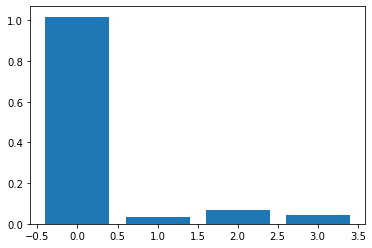

In [24]:
importance = LR_best.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [57]:
cln_test = test
cln_test["cln_loading"] = np.log(test["loading"])
cln_test["cln_measurement_0"] = np.sqrt(test["measurement_0"])
cln_test["cln_measurement_1"] = np.sqrt(test["measurement_1"])
cln_test["cln_measurement_2"] = np.sqrt(test["measurement_2"])
cln_test["cln_measurement_8"] = np.sqrt(test["measurement_8"])
cln_test["cln_measurement_15"] = np.sqrt(test["measurement_15"])
cln_test["cln_measurement_17"] = np.sqrt(test["measurement_17"])

cln_test = cln_test.drop("loading", axis = 1)
cln_test = cln_test.drop("measurement_0", axis = 1)
cln_test = cln_test.drop("measurement_1", axis = 1)
cln_test = cln_test.drop("measurement_2", axis = 1)
cln_test = cln_test.drop("measurement_8", axis = 1)
cln_test = cln_test.drop("measurement_15", axis = 1)
cln_test = cln_test.drop("measurement_17", axis = 1)


predictors = ["cln_loading", "cln_measurement_0", "cln_measurement_2", "cln_measurement_17"]

# create np.arrays from the trainings data
X_train = np.array(cln_train[predictors])
y_train = np.array(train[target])  # labels

# train the model = fit logistic function to trainings data
model = LogisticRegression().fit(X_train, y_train)

# Create predictions on the test set
X_test = np.array(cln_test[predictors])
y_test = LR_best.predict_proba(X_test)  # create y-labels through the learned model
print(y_test)

y_test = pd.DataFrame(y_test)

y_test.to_csv("submission.csv")

[[0.80403301 0.19596699]
 [0.84336269 0.15663731]
 [0.81380737 0.18619263]
 ...
 [0.87235812 0.12764188]
 [0.7685258  0.2314742 ]
 [0.853167   0.146833  ]]
